In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras.layers import Dense,Reshape,Flatten
from tensorflow.keras.models import Sequential


In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
## Selecting only specific data
y_train == 0
only_zeros = X_train[y_train==0]

In [5]:
only_zeros.shape

(5923, 28, 28)

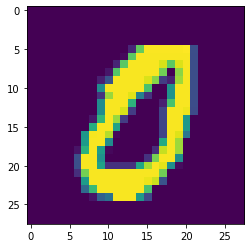

In [6]:
plt.imshow(only_zeros[10])

In [7]:
## Generator and Discriminator
## These are separate models and then combined at the end

## Discriminator
discriminator = Sequential()
discriminator.add(Flatten(input_shape = [28,28]))
discriminator.add(Dense(150,activation = 'relu'))
discriminator.add(Dense(100,activation = 'relu'))

## Output layer
discriminator.add(Dense(1,activation = 'sigmoid'))

## Compile
discriminator.compile(loss = 'binary_crossentropy',optimizer = 'adam')

## This is only predicting true or false basically real vs fake

In [8]:
## Generator
coding_size = 100 ## Middle layer size that feeds again to the increased size layers the second half

generator = Sequential()
generator.add(Dense(100,activation = 'relu',
                   input_shape = [coding_size]))
generator.add(Dense(150,activation = 'relu'
                   ))
generator.add(Dense(784,activation = 'relu'
                   ))
generator.add(Reshape([28,28])) ## Reshape to what the discriminator expects as input

## We do not compile the generator because it is compiled in the full GAN model.

In [9]:
GAN = Sequential([generator,discriminator])

In [10]:
discriminator.trainable = False

In [11]:
GAN.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [12]:
## Creating batch sizes for training
batch_size = 32
use_dataset = only_zeros

dataset = tf.data.Dataset.from_tensor_slices(use_dataset).shuffle(buffer_size = 1000)

In [13]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [14]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [15]:
dataset

<PrefetchDataset shapes: (32, 28, 28), types: tf.uint8>

In [16]:
epochs = 1

In [17]:
## Shows 2 layers as there are two models added as sequential

GAN.layers

In [18]:
## Creating the training loop

generator, discriminator = GAN.layers

for epoch in range(epochs):
    print('Current epoch {epoch+1}')
    i = 0
    
    for X_batch in dataset:
        i = i+1
        if i%100==0:
            print('Current batch number {i} of {len(use_dataset)//batch_size}')
        
        ## Discriminator
        noise = tf.random.normal(shape = [batch_size,coding_size])
        gen_images = generator(noise) ## Generating fake images
        
        X_fake_vs_Real = tf.concat([gen_images,tf.dtypes.cast(X_batch,tf.float32)],axis = 0) ## Combine fake images with the real images
        
        
        ## Set the target label for fake images
        y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size) ## Python list operation
        discriminator.trainable = True
        
        discriminator.train_on_batch(X_fake_vs_Real,y1)
        
        ## Generator
        noise = tf.random.normal(shape = [batch_size,coding_size])
        y2 = tf.constant([[1.0]]*batch_size)
        discriminator.trainable = False
        GAN.train_on_batch(noise,y2) ## Train the GAN

Current epoch {epoch+1}
Current batch number {i} of {len(use_dataset)//batch_size}


In [19]:
noise = tf.random.normal(shape = [10,coding_size])

In [20]:
noise.shape

TensorShape([10, 100])

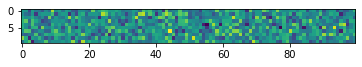

In [21]:
plt.imshow(noise)

In [22]:
images = generator(noise)

In [23]:
images.shape

TensorShape([10, 28, 28])

In [24]:
images

<tf.Tensor: id=73560, shape=(10, 28, 28), dtype=float32, numpy=
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.00361101],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ,

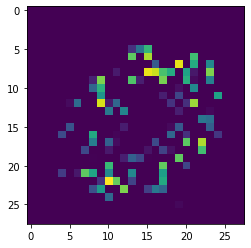

In [31]:
plt.imshow(images[7])